Exercise


Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

1) Measure prediction score using default n_estimators (10)
2) Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [517]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import pandas as pd

In [518]:
data_set = load_iris()
dir(data_set)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [519]:
data_set.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [520]:
target_array = data_set.target_names

In [521]:
df = pd.DataFrame(data_set.data,columns=data_set.feature_names)
target = pd.DataFrame(data_set.target,columns=['target'])
df = pd.concat([df,target],axis='columns')
df
# df.to_csv("df.csv")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [522]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [523]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),df['target'],test_size=0.2,random_state=10)
model = RandomForestClassifier(n_estimators=10)

In [524]:

model.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10)

In [531]:
y_pred = model.predict(x_test)
model.score(x_test,y_test)


0.9666666666666667

In [532]:
# import joblib
# joblib.dump(model,'model.joblib')

['model.joblib']

<function matplotlib.pyplot.show(close=None, block=None)>

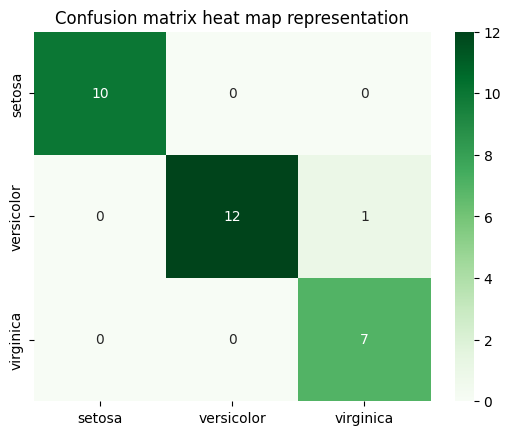

In [526]:
sns.heatmap(confusion_matrix(target_array[y_test],target_array[y_pred]),cmap='Greens',annot=True,xticklabels=target_array,yticklabels=target_array)
plt.title("Confusion matrix heat map representation")
plt.show